In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


mongo_logs = "logs_mongo_rust_1.txt"


df = pd.read_csv (mongo_logs, names = ["timestamp", "level", "parallel_tasks", "latency"])
df.head()

,timestamp,level,parallel_tasks,latency
0,2025-04-03T10:00:12.566Z,INFO,1 parallel reads,latency: 9.52388ms
1,2025-04-03T10:00:14.568Z,INFO,2 parallel reads,latency: 1.199971ms
2,2025-04-03T10:00:14.570Z,INFO,2 parallel reads,latency: 2.251051ms
3,2025-04-03T10:00:16.572Z,INFO,3 parallel reads,latency: 1.123195ms
4,2025-04-03T10:00:16.572Z,INFO,3 parallel reads,latency: 1.588141ms


In [2]:
list1 = []
list1 = df["latency"].tolist()
listMDB = []
for x in list1:
    listMDB.append(x.split(" "))
listMDB2 = []
for x in listMDB:
    match = re.match(r"([\d.]+)([a-zA-Zµ]+)", x[-1])
    if match.group(2) == "s":
        listMDB2.append(float(match.group(1))*1000)
    elif match.group(2) == "µs":
        listMDB2.append(float(match.group(1))/1000)
    elif match.group(2) == "ns":
        listMDB2.append(float(match.group(1))/1000/1000)
    else:
        listMDB2.append(float(match.group(1)))
lats = np.array(listMDB2)


In [4]:
mean_lats = []
used = 0

for x in range (1, 51, 1):
    y = np.mean(lats[x:x+used])
    mean_lats.append(y)
    used += x

x = range(1,51,1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


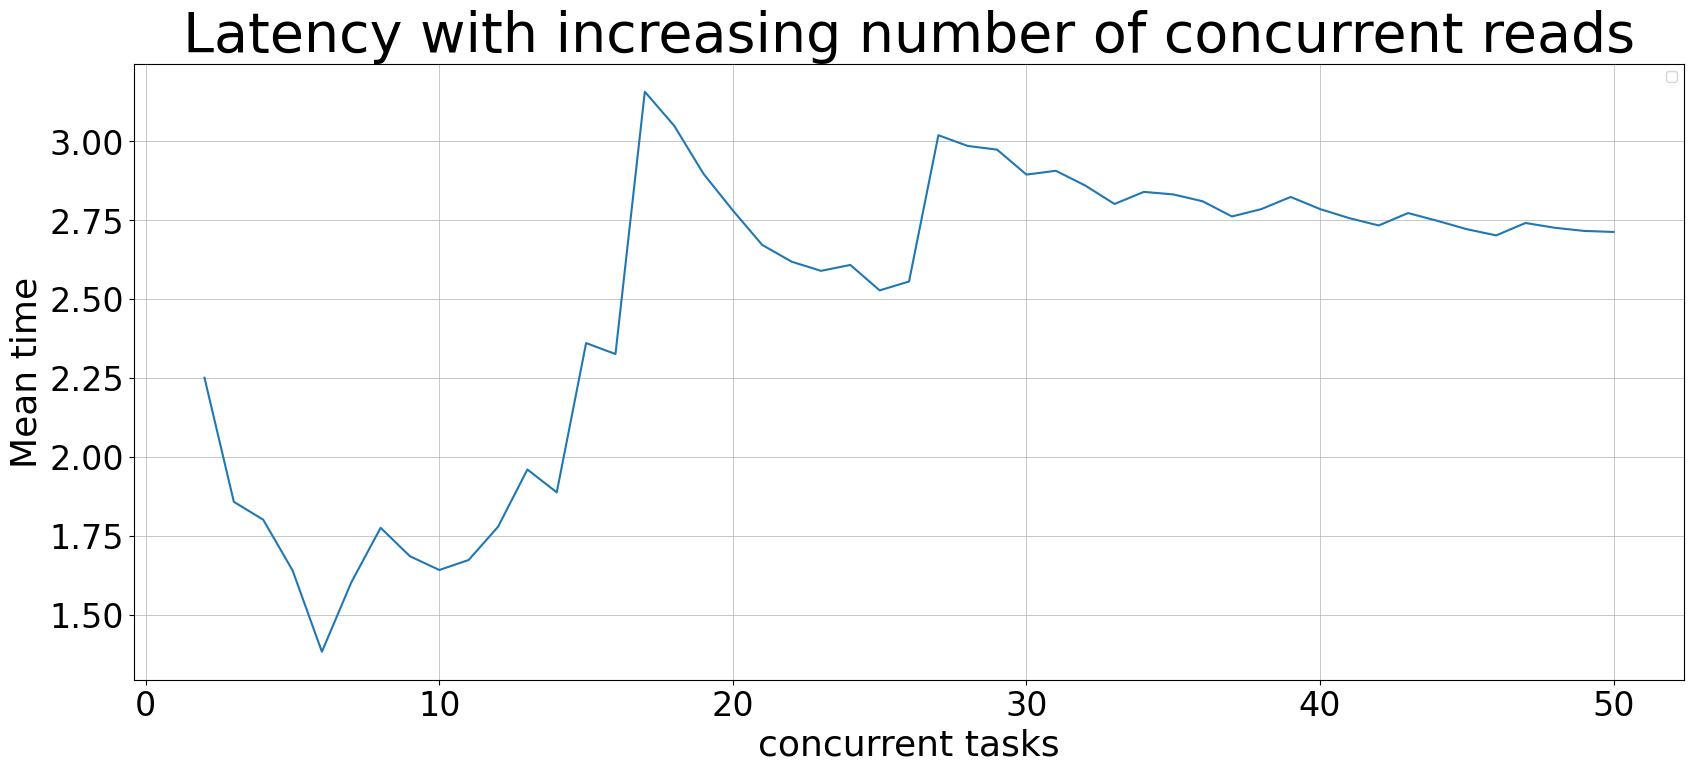

In [5]:
fig, ax = plt.subplots(figsize = (20,8)) 
ax.set_title("Latency with increasing number of concurrent reads", fontsize = 40)
ax.set_xlabel('concurrent tasks', fontsize = 26)
ax.set_ylabel('Mean time', fontsize = 26)
ax.plot(x, mean_lats)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax.grid(True, linewidth=0.5)
#ax.set_xticks(range(5,21,5))
#~plt.yscale('log')
plt.legend(loc = 'upper right')
plt.rc('legend', fontsize = 25)
plt.show() 